In [1]:
from extract_history_data import *
from util import *

from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

### Compute OSM sidewalk growth in the three cities
(Need to look for a more efficient way)

In [5]:
def compute_growth(df, qualifier):

    miny, maxy = 2007, 2022
    mp = defaultdict(int)
    res = dict([(year, 0) for year in range(miny, maxy + 1)])

    for item in df.to_numpy():
        item_id = item[0]
        tags = item[8]
        item_type = item[9]
        qualifies = qualifier(tags, item_type)

        if(not mp[item_id] and qualifies):
            mp[item_id] = 1

            all_versions = df[df['id']==item_id]
            n = len(all_versions)

            flag = False
            for i in range(0, n):
                cur = all_versions.iloc[i]
                cur_year = cur['ts'].year
                cur_tags = cur['tags']

                if(cur['visible'] and qualifier(cur_tags, item_type) and (not flag)):
                    flag = True
                    for year in range (cur_year, 2023): res[year] += 1
                elif(flag and not(cur['visible'] and qualifier(cur_tags, item_type))):
                    flag = False
                    for year in range(cur_year, 2023): res[year] -= 1

    return res

def extract_growth(cities):

    for city in cities:
        h = HistoryHandler()
        h.read_parsed_data(city)
        history = h.get_df(h.history)
        history = history.sort_values(by=['id', 'ts'])

        w_sidewalk_tag = compute_growth(history, highway_with_sidewalk_tag)
        df1 = pd.DataFrame.from_dict(w_sidewalk_tag.items())
        df1.columns = ['year', 'highway_with_sidewalk_info']

        wo_sidewalk_tag = compute_growth(history, highway_without_sidewalk_tag)
        df2 = pd.DataFrame.from_dict(wo_sidewalk_tag.items())
        df2.columns = ['year', 'highway_without_sidewalk_info']

        sidewalk = compute_growth(history, sidewalk_qualifier)
        df3 = pd.DataFrame.from_dict(sidewalk.items())
        df3.columns = ['year', 'sidewalk']

        df = df1.merge(df2, how='inner', on='year')
        df = df.merge(df3, how='inner', on='year')

        df.to_csv('data/growth/%s_sidewalk_growth.csv'%(city), index = False)

In [ ]:
cities = ['sea', 'chi', 'nyc']
extract_growth(cities)

### Plot growth of Sidewalks

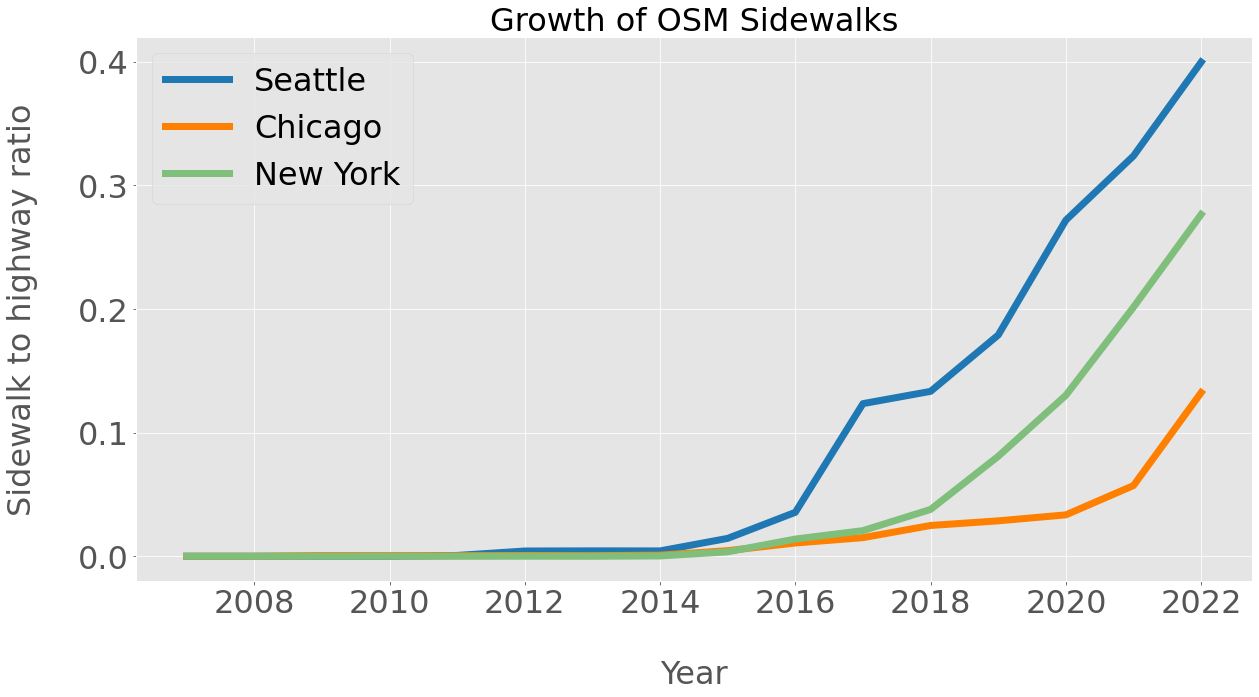

In [5]:
plt.style.use('ggplot')

df_sea = pd.read_csv('data/growth/sea_sidewalk_growth.csv')
df_chi = pd.read_csv('data/growth/chi_sidewalk_growth.csv')
df_nyc = pd.read_csv('data/growth/nyc_sidewalk_growth.csv')

fig, ax = plt.subplots(figsize=(20,10))

ax.set_title('Growth of OSM Sidewalks', fontsize='32')

# plot lines
ax.plot(df_sea["year"], df_sea["sidewalk_to_highway_ratio"], label = "Seattle", linewidth=7.0, color = '#1f78b4')
ax.plot(df_chi["year"], df_chi["sidewalk_to_highway_ratio"], label = "Chicago", linewidth=7.0, color = '#ff7f00')
ax.plot(df_nyc["year"], df_nyc["sidewalk_to_highway_ratio"], label = "New York", linewidth=7.0, color = '#7fbf7b')

# ax.get_yaxis().set_major_formatter(
# matplotlib.ticker.FuncFormatter(lambda x, p: int(int(x)/1000000)))

# ax.get_yaxis().set_major_formatter(
#     matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# ax.set_ylim(bottom= 0, top=1)
# ax.tick_params(axis='x', which='major', pad=15)

plt.xlabel("\nYear", fontsize='32')
plt.ylabel("Sidewalk to highway ratio\n", fontsize='32')
plt.xticks(fontsize='32')
plt.yticks(fontsize='32') 
plt.rc('legend',fontsize=32)
plt.locator_params(axis='y', nbins=5)
plt.locator_params(axis='x', nbins=10)

plt.legend()

plt.savefig("data/plots/Fig2/sidewalk_to_highway_ratio.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Plot growth of highways with sidewalk info

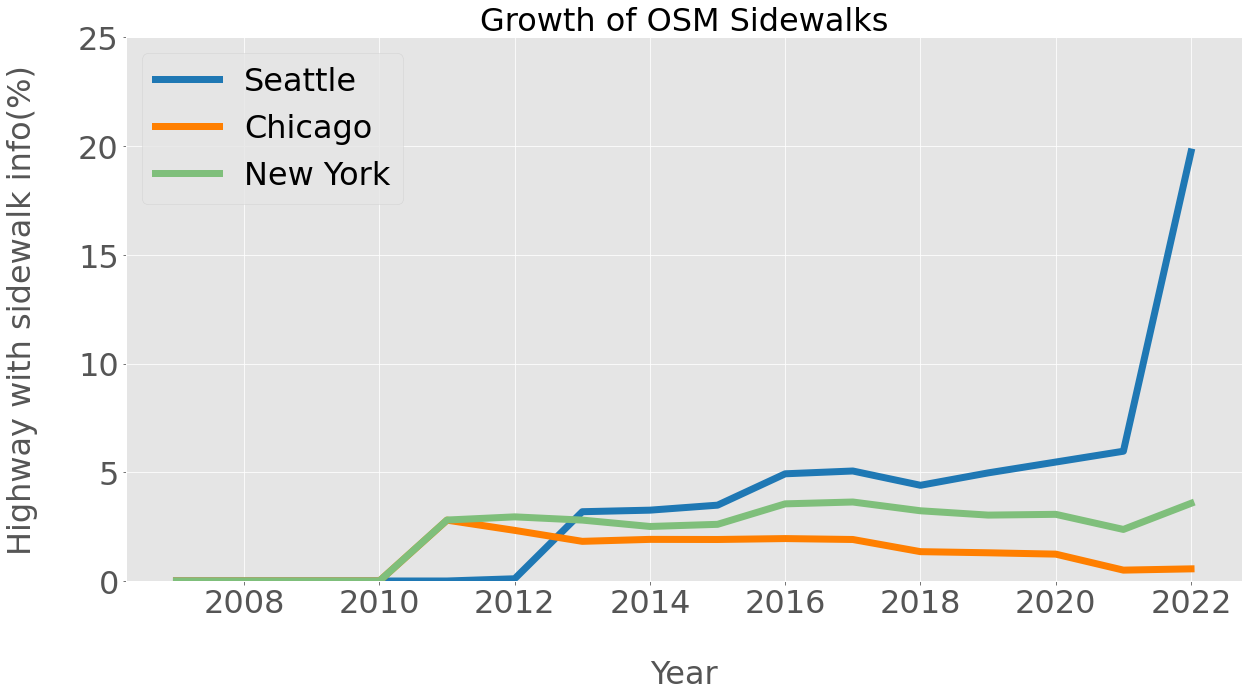

In [6]:
plt.style.use('ggplot')

df_sea = pd.read_csv('data/growth/sea_sidewalk_growth.csv')
df_chi = pd.read_csv('data/growth/chi_sidewalk_growth.csv')
df_nyc = pd.read_csv('data/growth/nyc_sidewalk_growth.csv')

fig, ax = plt.subplots(figsize=(20,10))

ax.set_title('Growth of OSM Sidewalks', fontsize='32')

# plot lines
ax.plot(df_sea["year"], df_sea["sidewalk_tag_percentage(%)"], label = "Seattle", linewidth=7.0, color = '#1f78b4')
ax.plot(df_chi["year"], df_chi["sidewalk_tag_percentage(%)"], label = "Chicago", linewidth=7.0, color = '#ff7f00')
ax.plot(df_nyc["year"], df_nyc["sidewalk_tag_percentage(%)"], label = "New York", linewidth=7.0, color = '#7fbf7b')

# ax.get_yaxis().set_major_formatter(
# matplotlib.ticker.FuncFormatter(lambda x, p: int(int(x)/1000000)))

# ax.get_yaxis().set_major_formatter(
#     matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_ylim(bottom= 0, top=25)
# ax.tick_params(axis='x', which='major', pad=15)

plt.xlabel("\nYear", fontsize='32')
plt.ylabel("Highway with sidewalk info(%)\n", fontsize='32')
plt.xticks(fontsize='32')
plt.yticks(fontsize='32') 
plt.rc('legend',fontsize=32)
# plt.locator_params(axis='y', nbins=5)
# plt.locator_params(axis='x', nbins=10)

plt.legend()
plt.savefig("data/plots/Fig2/highway_w_sidewalk_info.pdf", format="pdf", bbox_inches="tight")
plt.show()